In [1]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('Flip_lap_Project.xlsx')

In [3]:
df.head()

,Unnamed: 0,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
0,0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor
1,1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
2,2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
3,3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor
4,4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1004 non-null   int64  
 1   Brands            984 non-null    object 
 2   Price             983 non-null    float64
 3   Original Price    968 non-null    float64
 4   SSD               989 non-null    object 
 5   Operating System  987 non-null    object 
 6   Size              986 non-null    object 
 7   RAM               985 non-null    object 
 8   Processor         996 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.7+ KB


## Dropping the Column 'Unnamed: 0' 

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)


## Dropping the Duplicates

In [7]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)
...,...,...,...,...,...,...,...,...
954,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor
955,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
956,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,38.86 cm (15.3 Inch) Display,8 GB Unified Memory RAM,Apple M2 Processor
957,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen)


## Checking and treating the Null Values

In [8]:
df.isnull().sum()

Brands              17
Price               18
Original Price      33
SSD                 14
Operating System    15
Size                15
RAM                 16
Processor            6
dtype: int64

In [9]:
x = df[df.Brands.isnull()]
ind = x.index
df.drop(ind, inplace = True)

In [10]:
df.reset_index(drop=True,inplace = True)

In [11]:
df

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)
...,...,...,...,...,...,...,...,...
937,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor
938,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
939,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,38.86 cm (15.3 Inch) Display,8 GB Unified Memory RAM,Apple M2 Processor
940,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen)


In [12]:
df.isnull().sum()

Brands               0
Price                1
Original Price      16
SSD                  9
Operating System     0
Size                 0
RAM                  0
Processor            0
dtype: int64

## Treating the null Values present in the SSD Column

In [13]:
df[df.SSD.isnull()]

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
23,HP Intel Core i3 11th Gen 1115G4 -,37878.0,49509.0,NaN,64 bit Windows 11 Operating System,35.56 cm (14 inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)
118,Lenovo ThinkPad E14 Ryzen 5 Hexa Core 7530U -,54990.0,95111.0,NaN,Windows 11 Operating System,35.56 cm (14 Inch) Display,16 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
139,DELL Core i3 10th Gen 1005G1 -,38500.0,59101.0,NaN,64 bit Windows 10 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (10th Gen)
160,HP G8 Core i3 11th Gen 1115G4 -,34990.0,43763.0,NaN,32 bit Windows 11 Operating System,35.56 cm (14 inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)
336,MSI Core i5 12th Gen 1235U -,46990.0,67990.0,NaN,Windows 11 Operating System,35.56 cm (14 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen)
430,Infinix X2 Slim Intel Core i3 11th Gen 1115G4 -,29990.0,49990.0,NaN,64 bit Windows 11 Operating System,35.56 cm (14 inch) Display,8 GB LPDDR4X RAM,Intel Core i3 Processor (11th Gen)
803,Acer Nitro 5 Core i5 11th Gen 11400H -,59990.0,NaN,NaN,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
848,HP Victus Gaming Ryzen 5 Hexa Core 5600H -,59490.0,146490.0,NaN,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,16 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
849,ASUS ROG Core i7 7th Gen 7700HQ -,137990.0,NaN,NaN,Pre-installed Genuine Windows 10 Operating Sys...,39.62 cm (15.6 inch) Display,8 GB DDR4 RAM,Intel Core i7 Processor (7th Gen)


In [14]:
df.Brands.value_counts()

MSI Core i7 13th Gen 13700H -                                   12
HP Victus Ryzen 5 Hexa Core 5600H -                             11
HP 15s                                                          10
MSI Core i5 12th Gen 12450H -                                    9
HP Pavilion Aero                                                 8
                                                                ..
SAMSUNG Galaxy Book3 360 Intel EVO Core i7 13th Gen 1360P -      1
DELL Inspiron 3000 Core i3 13th Gen 1305U -                      1
Infinix INBook X2 Plus Core i3 11th Gen 1115G4 -                 1
DELL Core i5 12th Gen 12500H -                                   1
GIGABYTE G Series Core i5 12th Gen 12500H -                      1
Name: Brands, Length: 563, dtype: int64

In [15]:
df1 = df.copy(deep=True)

In [16]:
df1.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)


In [17]:
df1.Brands[0].split()

['HP', '360', 'Intel', 'Celeron', 'Quad', 'Core', 'N4020', '-']

In [18]:
df.groupby(['RAM','Processor'])['SSD'].sum()

RAM                                       Processor                                 
16 GB DDR RAM                             AMD Ryzen 7 Octa Core Processor                                                      512 GB SSD
16 GB DDR4 RAM                            AMD Ryzen 3 Quad Core Processor                                            512 GB SSD512 GB SSD
                                          AMD Ryzen 5 Hexa Core Processor               512 GB SSD256 GB SSD512 GB SSD512 GB SSD512 GB...
                                          AMD Ryzen 5 Hexa Core Processor (10th Gen)                                           512 GB SSD
                                          AMD Ryzen 5 Octa Core Processor                                                      512 GB SSD
                                                                                                              ...                        
8 GB LPDDR5 RAM                           Intel Core i5 Processor (13th Gen)           

In [19]:
len(df1.Brands)

942

In [20]:
df1

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen)
...,...,...,...,...,...,...,...,...
937,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor
938,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen)
939,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,38.86 cm (15.3 Inch) Display,8 GB Unified Memory RAM,Apple M2 Processor
940,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen)


### Creating New Column 'Name' From Brands

In [21]:
df1['Name']=['HP' if 'HP' in i else 'Lenovo' if 'Lenovo' in i else 'Infinix' if 'Infinix' in i else 'Acer' if 'Acer' in i else 'ASUS' if 'ASUS' in i else 'SAMSUNG' if 'SAMSUNG' in i else 'MSI' if 'MSI' in i else 'DELL' if 'DELL' in i else 'APPLE' if 'APPLE' in i else 'CHUWI' if 'CHUWI' in i else 'GIGABYTE' if 'GIGABYTE' in i else 'others' for i in df.Brands ]

In [22]:
df1

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP
...,...,...,...,...,...,...,...,...,...
937,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor,HP
938,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),Acer
939,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,38.86 cm (15.3 Inch) Display,8 GB Unified Memory RAM,Apple M2 Processor,APPLE
940,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen),GIGABYTE


In [23]:
df1['Operating System'].unique()

array(['64 bit Chrome Operating System',
       '64 bit Windows 11 Operating System',
       'Windows 11 Operating System',
       '64 bit Windows 10 Operating System',
       'WPS Office, Operating System Software',
       'Windows 10 Operating System', 'DOS Operating System',
       'Chrome Operating System', '32 bit Windows 11 Operating System',
       'Mac OS Operating System', '64 bit DOS Operating System',
       '32 bit Chrome Operating System',
       'Windows 11 Home Operating System', 'Prime OS Operating System',
       'Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)'],
      dtype=object)

### Assign values to 'Operating Sys' column based on  'Operating System' column

In [24]:
df1['Operating Sys'] = [
    'Chrome' if 'Chrome' in i else
    'Windows 11' if 'Windows 11' in i else
    'Windows 10' if 'Windows 10' in i else
    'WPS Office' if 'WPS Office' in i else
    'DOS' if 'DOS' in i else
    'Mac OS' if 'Mac OS' in i else
    'others'  
    for i in df['Operating System']
]


In [25]:
df1.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11


In [26]:
df1.Processor.unique()

array(['Intel Celeron Quad Core Processor',
       'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor (11th Gen)',
       'AMD Athlon Dual Core Processor',
       'Intel Core i3 Processor (11th Gen)',
       'Intel Core i3 Processor (10th Gen)',
       'AMD Ryzen 7 Octa Core Processor',
       'Intel Celeron Dual Core Processor (10th Gen)',
       'Intel Core i3 Processor (12th Gen)',
       'AMD Ryzen 3 Quad Core Processor',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Celeron Dual Core Processor',
       'Intel Core i5 Processor (13th Gen)',
       'AMD Ryzen 3 Dual Core Processor',
       'Intel Core i7 Processor (12th Gen)',
       'AMD Ryzen 9 Octa Core Processor',
       'Intel Core i7 Processor (13th Gen)',
       'Intel Core i9 Processor (13th Gen)',
       'AMD Ryzen 5 Quad Core Processor',
       'Intel Core i3 Processor (13th Gen)',
       'Intel Celeron Dual Core Processor (4th Gen)',
       'Intel Core i7 Processor (11th Gen)', 'Intel Core i3 

### Assign values to 'Processor' column based on  'Processor' column

In [27]:
df1['Processors'] = [
    'Intel Celeron' if 'Intel Celeron' in i else 
    'Intel Core i5' if 'Core i5' in i else
    'AMD Ryzen 7' if 'AMD Ryzen 7' in i else
    'AMD Ryzen 5' if 'AMD Ryzen 5' in i else
    'AMD Ryzen 3' if 'AMD Ryzen 3' in i else
    'AMD Ryzen 9' if 'AMD Ryzen 9' in i else
    'Intel Core i3' if 'Core i3' in i else
    'AMD Athlon' if 'AMD Athlon' in i else
    'Intel Core i7' if 'Core i7' in i else
    'Intel Core i9' if 'Core i9' in i else
    'Intel Core i3' if 'Intel i3' in i else
    'Intel Core i5' if 'Intel i5' in i else
    'Intel Core i7' if 'Intel i7' in i else
    'Apple M2' if 'Apple M2' in i else
    'AMD Ryzen 5' if 'Ryzen R5' in i else
    'AMD Ryzen 3' if 'Intel Ryzen 3' in i else
    'others'
    for i in df1.Processor]


In [28]:
df1.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3


In [29]:
df1.Processors.value_counts()

Intel Core i5    259
Intel Core i7    170
Intel Core i3    125
AMD Ryzen 5      111
AMD Ryzen 7      106
Intel Core i9     41
AMD Ryzen 3       37
AMD Ryzen 9       28
Intel Celeron     26
Apple M2          17
others            13
AMD Athlon         9
Name: Processors, dtype: int64

In [30]:
df1.SSD.unique()

array(['512 GB SSD', '1 TB SSD', '256 GB SSD', '128 GB SSD', nan,
       '1 TB HDD|256 GB SSD', '1 TB HDD',
       'RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD',
       'RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 256GB SSD', '4 TB SSD',
       'RAM & Storage: 8GB DDR4 & 512GB SSD', '2 TB SSD',
       'RAM & Storage: 16GB DDR4 & 512GB SSD',
       'RAM & Storage: 8GB DDR4 & 1TB + 256GB SSD', '1 TB HDD|512 GB SSD',
       'RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 512GB SSD',
       '1 TB HDD|1 TB SSD', '1 TB HDD|128 GB SSD',
       'PCI-e SSD (NVMe) ready,Cooler Boost,Matrix Display (Extend),Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel',
       'RAM & Storage: 16GB, 2x8GB, DDR5, 4800Mhz & 512GB SSD'],
      dtype=object)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            942 non-null    object 
 1   Price             941 non-null    float64
 2   Original Price    926 non-null    float64
 3   SSD               933 non-null    object 
 4   Operating System  942 non-null    object 
 5   Size              942 non-null    object 
 6   RAM               942 non-null    object 
 7   Processor         942 non-null    object 
 8   Name              942 non-null    object 
 9   Operating Sys     942 non-null    object 
 10  Processors        942 non-null    object 
dtypes: float64(2), object(9)
memory usage: 81.1+ KB


### Assign values to 'Memory' column based 'SSD' column

### The isinstance() function in Python is used to check if an object is an instance of a specified class or a tuple of classes. It helps you determine whether an object belongs to a particular class or a subclass of that class.
                    ---->isinstance(object, classinfo)
--object: The object you want to check.
--classinfo: A class or a tuple of classes that you want to check against.

In [32]:
df1['Memory'] = [
    '512 GB SSD' if isinstance(i, str) and '512 GB SSD' in i else
    '1 TB SSD' if isinstance(i, str) and '1 TB SSD' in i else
    '256 GB SSD' if isinstance(i, str) and '256 GB SSD' in i else
    '128 GB SSD' if isinstance(i, str) and '128 GB SSD' in i else
    '1 TB HDD' if isinstance(i, str) and '1 TB HDD' in i else
    '1 TB HDD + 256 GB SSD' if isinstance(i, str) and ('1 TB HDD|256 GB SSD' in i or '1TB HDD + 256GB SSD' in i) else
    '256 GB SSD' if isinstance(i, str) and 'RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 256GB SSD' in i else
    '4 TB SSD' if isinstance(i, str) and '4 TB SSD' in i else
    '512 GB SSD' if isinstance(i, str) and 'RAM & Storage: 8GB DDR4 & 512GB SSD' in i else
    '2 TB SSD' if isinstance(i, str) and '2 TB SSD' in i else
    '512 GB SSD' if isinstance(i, str) and 'RAM & Storage: 16GB DDR4 & 512GB SSD' in i else
    '1 TB HDD + 256 GB SSD' if isinstance(i, str) and 'RAM & Storage: 8GB DDR4 & 1TB + 256GB SSD' in i else
    '1 TB HDD + 512 GB SSD' if isinstance(i, str) and '1 TB HDD|512 GB SSD' in i else
    '512 GB SSD' if isinstance(i, str) and 'RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 512GB SSD' in i else
    '1 TB HDD + 1 TB SSD' if isinstance(i, str) and '1 TB HDD|1 TB SSD' in i else
    '1 TB HDD + 128 GB SSD' if isinstance(i, str) and '1 TB HDD|128 GB SSD' in i else
    '512 GB SSD' if isinstance(i, str) and 'RAM & Storage: 16GB, 2x8GB, DDR5, 4800Mhz & 512GB SSD' in i else
    'Others'  
    for i in df1['SSD']
]


In [33]:
df1.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,35.56 cm (14 Inch) Touchscreen Display,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron,512 GB SSD
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5,512 GB SSD
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon,512 GB SSD
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3,512 GB SSD


### Spliting information present in Size and taking only numeric value

In [34]:
y=[]
for i in range(len(df1.Size)):
    y.append(df1['Size'].str.split()[i][2])
    

In [35]:
df1['Size']=y

In [36]:
df1

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,(14,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron,512 GB SSD
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,(15.6,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,(15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5,512 GB SSD
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,(15.6,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon,512 GB SSD
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,(15.6,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3,512 GB SSD
...,...,...,...,...,...,...,...,...,...,...,...,...
937,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,(15.6,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor,HP,Windows 11,AMD Ryzen 3,512 GB SSD
938,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,(15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),Acer,Windows 11,Intel Core i5,512 GB SSD
939,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,(15.3,8 GB Unified Memory RAM,Apple M2 Processor,APPLE,Mac OS,Apple M2,256 GB SSD
940,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,(15.6,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen),GIGABYTE,Windows 11,Intel Core i5,512 GB SSD


In [37]:
df1['Size']=df1['Size'].str.replace('(','')

In [38]:
df1.Size.value_counts()

15.6        495
14          203
16           83
13.3         33
17.3         29
16.1         17
38           11
13.4         10
39.62         7
15.3          7
11.6          6
14.1          5
13.6          5
15            4
16.2          4
14.96         3
17            2
Portable      2
18            2
14.2          2
15.36         2
14.5          1
13.78         1
33.78         1
13            1
13.5          1
40.64         1
7             1
35.56         1
36.62         1
13.8          1
Name: Size, dtype: int64

In [39]:
df1.loc[df1['Size'] == '38', 'Size'] = '14.9'


In [40]:
df1[df1.Size=='38']

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory


In [41]:
df1.loc[df1['Size']=='39.62','Size']='15.6'

In [42]:
df1.loc[df1['Size']=='33.78','Size']='13.3'

In [43]:
df1.loc[df1['Size']=='40.64','Size']='16'

In [44]:
df1.loc[df1['Size']=='35.56','Size']='14'

In [45]:
df1.loc[df1['Size']=='36.62','Size']='14.4'

In [46]:
z = df1.loc[df1['Size']=='Portable']
z = z.index
df1.drop(z,inplace=True)


In [47]:
df1.reset_index(drop=True)

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,14,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron,512 GB SSD
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5,512 GB SSD
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon,512 GB SSD
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3,512 GB SSD
...,...,...,...,...,...,...,...,...,...,...,...,...
935,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor,HP,Windows 11,AMD Ryzen 3,512 GB SSD
936,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),Acer,Windows 11,Intel Core i5,512 GB SSD
937,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,15.3,8 GB Unified Memory RAM,Apple M2 Processor,APPLE,Mac OS,Apple M2,256 GB SSD
938,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen),GIGABYTE,Windows 11,Intel Core i5,512 GB SSD


In [48]:
df1.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,14,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron,512 GB SSD
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5,512 GB SSD
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon,512 GB SSD
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3,512 GB SSD


In [49]:
df1.RAM.value_counts()

8 GB DDR4 RAM                               301
16 GB DDR4 RAM                              243
16 GB DDR5 RAM                              119
16 GB LPDDR5 RAM                             64
32 GB DDR5 RAM                               39
16 GB LPDDR4X RAM                            31
8 GB LPDDR5 RAM                              26
8 GB LPDDR4X RAM                             20
4 GB DDR4 RAM                                18
8 GB DDR5 RAM                                15
8 GB Unified Memory RAM                      13
4 GB LPDDR4 RAM                               9
32 GB LPDDR5 RAM                              7
16 GB Unified Memory RAM                      7
16 GB LPDDR3 RAM                              4
64 GB DDR5 RAM                                4
16 GB DDR4X RAM                               4
32 GB DDR4 RAM                                3
32 GB LPDDR5X RAM                             2
32 GB Unified Memory RAM                      2
32 GB LPDDR4X RAM                       

In [50]:
df1

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,14,4 GB LPDDR4 RAM,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron,512 GB SSD
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5,512 GB SSD
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon,512 GB SSD
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3,512 GB SSD
...,...,...,...,...,...,...,...,...,...,...,...,...
937,HP Ryzen 3 Quad Core R3 3250 -,29980.0,59990.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,AMD Ryzen 3 Quad Core Processor,HP,Windows 11,AMD Ryzen 3,512 GB SSD
938,Acer Aspire 3 Core i5 11th Gen 1135G7 -,43490.0,134900.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (11th Gen),Acer,Windows 11,Intel Core i5,512 GB SSD
939,APPLE 2023 Macbook Air M2 -,126990.0,154300.0,256 GB SSD,Mac OS Operating System,15.3,8 GB Unified Memory RAM,Apple M2 Processor,APPLE,Mac OS,Apple M2,256 GB SSD
940,GIGABYTE G Series Core i5 12th Gen 12500H -,94990.0,232314.0,512 GB SSD,Windows 11 Operating System,15.6,8 GB DDR4 RAM,Intel Core i5 Processor (12th Gen),GIGABYTE,Windows 11,Intel Core i5,512 GB SSD


#### z=[]
for i in range(len(df1.RAM)):
    z.append(df1['RAM'].str.split()[i][0])
    

In [51]:
 z = []
for ram_value in df1['RAM']:
    if isinstance(ram_value, str):
        split_value = ram_value.split()
        if split_value:
            z.append(split_value[0])
        else:
            z.append(None)  
    else:
        z.append(None)  



In [52]:
df1.isnull().sum()

Brands               0
Price                1
Original Price      16
SSD                  9
Operating System     0
Size                 0
RAM                  0
Processor            0
Name                 0
Operating Sys        0
Processors           0
Memory               0
dtype: int64

In [53]:
df1['RAM'].str.split()[2][0]

'8'

In [54]:
df1['RAM'] = z

In [55]:
df1[df1['RAM']=='LPDDR5']

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
68,Acer Extensa,36990.0,50999.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,LPDDR5,AMD Ryzen 5 Quad Core Processor,Acer,Windows 11,AMD Ryzen 5,512 GB SSD


In [56]:
df1[(df1.Name=='Acer') & (df1.Memory=='512 GB SSD') & (df1.Processor=='AMD Ryzen 5 Quad Core Processor')]

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
68,Acer Extensa,36990.0,50999.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,LPDDR5,AMD Ryzen 5 Quad Core Processor,Acer,Windows 11,AMD Ryzen 5,512 GB SSD
361,Acer Aspire 3 Ryzen 5 Quad Core 7520U -,39990.0,58990.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8,AMD Ryzen 5 Quad Core Processor,Acer,Windows 11,AMD Ryzen 5,512 GB SSD


In [57]:
df1.loc[df1['RAM']=='LPDDR5','RAM']='8'

In [58]:
df1.head()

,Brands,Price,Original Price,SSD,Operating System,Size,RAM,Processor,Name,Operating Sys,Processors,Memory
0,HP 360 Intel Celeron Quad Core N4020 -,22990.0,31156.0,512 GB SSD,64 bit Chrome Operating System,14,4,Intel Celeron Quad Core Processor,HP,Chrome,Intel Celeron,512 GB SSD
1,HP Ryzen 5 Hexa Core 5500U -,42490.0,49631.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8,AMD Ryzen 5 Hexa Core Processor,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 -,42990.0,69990.0,512 GB SSD,64 bit Windows 11 Operating System,15.6,8,Intel Core i5 Processor (11th Gen),ASUS,Windows 11,Intel Core i5,512 GB SSD
3,HP 2023 Athlon Dual Core 3050U -,30990.0,35147.0,512 GB SSD,Windows 11 Operating System,15.6,8,AMD Athlon Dual Core Processor,HP,Windows 11,AMD Athlon,512 GB SSD
4,HP Laptop Core i3 11th Gen 1115G4 -,38990.0,49025.0,512 GB SSD,Windows 11 Operating System,15.6,8,Intel Core i3 Processor (11th Gen),HP,Windows 11,Intel Core i3,512 GB SSD


In [59]:
df1.drop(['Brands','SSD','Operating System','Processor'],axis = 1, inplace = True)

In [60]:
df1.reset_index(drop=True,inplace=True)

In [61]:
df1

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD
...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8,HP,Windows 11,AMD Ryzen 3,512 GB SSD
936,43490.0,134900.0,15.6,8,Acer,Windows 11,Intel Core i5,512 GB SSD
937,126990.0,154300.0,15.3,8,APPLE,Mac OS,Apple M2,256 GB SSD
938,94990.0,232314.0,15.6,8,GIGABYTE,Windows 11,Intel Core i5,512 GB SSD


In [62]:
df1[df1['Original Price'].isnull()]

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
93,41990.0,NaN,14,8,MSI,Windows 11,AMD Ryzen 5,512 GB SSD
473,58990.0,NaN,15.6,16,HP,Windows 11,AMD Ryzen 5,512 GB SSD
520,53990.0,NaN,15.6,16,MSI,Windows 11,Intel Core i7,1 TB SSD
544,67490.0,NaN,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
567,119990.0,NaN,15.6,16,MSI,Windows 11,Intel Core i7,1 TB SSD
568,104690.0,NaN,14,16,DELL,Windows 11,Intel Core i7,512 GB SSD
640,32990.0,NaN,15.6,8,ASUS,Windows 11,Intel Core i3,512 GB SSD
733,309490.0,NaN,16.2,32,APPLE,Mac OS,others,1 TB SSD
800,102890.0,NaN,14,16,ASUS,Windows 11,Intel Core i5,512 GB SSD
801,59990.0,NaN,15.6,8,Acer,Windows 11,Intel Core i5,Others


In [63]:
round(df1['Original Price'].mean())

115336

In [64]:
df1['Original Price'].fillna(115336, inplace=True)

In [65]:
df1[df1['Original Price'].isnull()]

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory


In [66]:
df1[df1['Price'].isnull()]

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
824,NaN,115336.0,15.6,8,Lenovo,Windows 10,Intel Core i5,512 GB SSD


In [67]:
df1['Price'].mean()

89352.00532481362

In [68]:
df1['Price'].fillna(89352, inplace=True)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           940 non-null    float64
 1   Original Price  940 non-null    float64
 2   Size            940 non-null    object 
 3   RAM             940 non-null    object 
 4   Name            940 non-null    object 
 5   Operating Sys   940 non-null    object 
 6   Processors      940 non-null    object 
 7   Memory          940 non-null    object 
dtypes: float64(2), object(6)
memory usage: 58.9+ KB


In [70]:
df1.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD


In [71]:
df1.describe()

,Price,Original Price
count,940.000000,940.000000
mean,89352.005319,115336.193617
std,66154.445262,80305.781713
min,13990.000000,24990.000000
25%,48990.000000,66812.500000
50%,67990.000000,89990.000000
75%,106240.000000,134217.500000
max,580990.000000,671990.000000


In [72]:
df2=df1.copy(deep=True)

In [73]:
df2

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD
...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8,HP,Windows 11,AMD Ryzen 3,512 GB SSD
936,43490.0,134900.0,15.6,8,Acer,Windows 11,Intel Core i5,512 GB SSD
937,126990.0,154300.0,15.3,8,APPLE,Mac OS,Apple M2,256 GB SSD
938,94990.0,232314.0,15.6,8,GIGABYTE,Windows 11,Intel Core i5,512 GB SSD


In [147]:
df1

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,10.042815,31156.0,14.0,4.0,6,0,6,7
1,10.657024,49631.0,15.6,8.0,6,5,2,7
2,10.668723,69990.0,15.6,8.0,1,5,8,7
3,10.341420,35147.0,15.6,8.0,6,5,0,7
4,10.571060,49025.0,15.6,8.0,6,5,7,7
...,...,...,...,...,...,...,...,...
935,10.308286,59990.0,15.6,8.0,6,5,1,7
936,10.680286,134900.0,15.6,8.0,2,5,8,7
937,11.751864,154300.0,15.3,8.0,0,2,5,5
938,11.461527,232314.0,15.6,8.0,5,5,8,7


In [149]:
df1.corr()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
Price,1.000000,0.752055,0.232933,0.738210,-0.108820,0.060409,0.279853,-0.377108
Original Price,0.752055,1.000000,0.193635,0.647996,-0.085103,0.007294,0.195910,-0.371356
Size,0.232933,0.193635,1.000000,0.190418,0.074027,0.177943,0.066797,-0.058927
RAM,0.738210,0.647996,0.190418,1.000000,-0.004299,0.172313,0.187504,-0.293128
Name,-0.108820,-0.085103,0.074027,-0.004299,1.000000,0.051929,0.087376,0.083193
Operating Sys,0.060409,0.007294,0.177943,0.172313,0.051929,1.000000,0.038955,0.060834
Processors,0.279853,0.195910,0.066797,0.187504,0.087376,0.038955,1.000000,-0.105833
Memory,-0.377108,-0.371356,-0.058927,-0.293128,0.083193,0.060834,-0.105833,1.000000


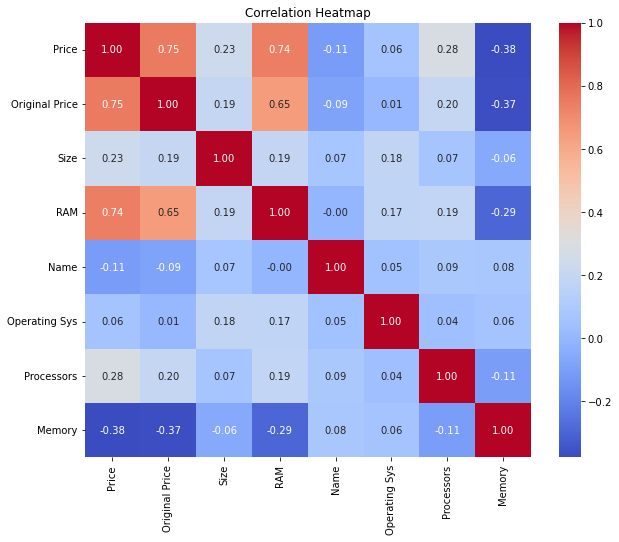

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df1.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# LabelEncoder

In [75]:
from sklearn.preprocessing import LabelEncoder


In [76]:
df1['Name']=LabelEncoder().fit_transform(df1['Name'])
df1.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,6,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,6,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,1,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,6,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,6,Windows 11,Intel Core i3,512 GB SSD


In [77]:
df1['Operating Sys']=LabelEncoder().fit_transform(df1['Operating Sys'])
df1.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,6,0,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,6,5,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,1,5,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,6,5,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,6,5,Intel Core i3,512 GB SSD


In [78]:
df1['Processors']=LabelEncoder().fit_transform(df1['Processors'])
df1.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,6,0,6,512 GB SSD
1,42490.0,49631.0,15.6,8,6,5,2,512 GB SSD
2,42990.0,69990.0,15.6,8,1,5,8,512 GB SSD
3,30990.0,35147.0,15.6,8,6,5,0,512 GB SSD
4,38990.0,49025.0,15.6,8,6,5,7,512 GB SSD


In [79]:
df1['Memory']=LabelEncoder().fit_transform(df1['Memory'])
df1.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,6,0,6,7
1,42490.0,49631.0,15.6,8,6,5,2,7
2,42990.0,69990.0,15.6,8,1,5,8,7
3,30990.0,35147.0,15.6,8,6,5,0,7
4,38990.0,49025.0,15.6,8,6,5,7,7


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           940 non-null    float64
 1   Original Price  940 non-null    float64
 2   Size            940 non-null    object 
 3   RAM             940 non-null    object 
 4   Name            940 non-null    int64  
 5   Operating Sys   940 non-null    int64  
 6   Processors      940 non-null    int64  
 7   Memory          940 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 58.9+ KB


In [81]:
df1

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,6,0,6,7
1,42490.0,49631.0,15.6,8,6,5,2,7
2,42990.0,69990.0,15.6,8,1,5,8,7
3,30990.0,35147.0,15.6,8,6,5,0,7
4,38990.0,49025.0,15.6,8,6,5,7,7
...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8,6,5,1,7
936,43490.0,134900.0,15.6,8,2,5,8,7
937,126990.0,154300.0,15.3,8,0,2,5,5
938,94990.0,232314.0,15.6,8,5,5,8,7


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           940 non-null    float64
 1   Original Price  940 non-null    float64
 2   Size            940 non-null    object 
 3   RAM             940 non-null    object 
 4   Name            940 non-null    int64  
 5   Operating Sys   940 non-null    int64  
 6   Processors      940 non-null    int64  
 7   Memory          940 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 58.9+ KB


In [83]:
df1['Size']=df1['Size'].astype(float)

In [84]:
df1['RAM']=df1['RAM'].astype(float)

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           940 non-null    float64
 1   Original Price  940 non-null    float64
 2   Size            940 non-null    float64
 3   RAM             940 non-null    float64
 4   Name            940 non-null    int64  
 5   Operating Sys   940 non-null    int64  
 6   Processors      940 non-null    int64  
 7   Memory          940 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 58.9 KB


In [86]:
df1[df1['Original Price'].isnull()]

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory


In [87]:
df1.isnull().sum()

Price             0
Original Price    0
Size              0
RAM               0
Name              0
Operating Sys     0
Processors        0
Memory            0
dtype: int64

In [88]:
RAM = np.random.randint(1,64,size=940)
price = np.random.randint(13000,500000,size=940)
df= pd.DataFrame({'RAM':RAM,'Price':price})
df.head()

,RAM,Price
0,53,338091
1,60,414661
2,63,343018
3,39,424261
4,31,445331


In [89]:
 Discount = ((df1['Original Price'] - df1['Price']) / df1['Original Price']) * 100
Discount.mean()

18.851809249632357

#### import pandas as pd


df1= df1[df1['Percentage Discount'] >= 0]


print(df1)


In [90]:
df1

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14.0,4.0,6,0,6,7
1,42490.0,49631.0,15.6,8.0,6,5,2,7
2,42990.0,69990.0,15.6,8.0,1,5,8,7
3,30990.0,35147.0,15.6,8.0,6,5,0,7
4,38990.0,49025.0,15.6,8.0,6,5,7,7
...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8.0,6,5,1,7
936,43490.0,134900.0,15.6,8.0,2,5,8,7
937,126990.0,154300.0,15.3,8.0,0,2,5,5
938,94990.0,232314.0,15.6,8.0,5,5,8,7


#### import matplotlib.pyplot as plt


plt.hist(df1['Percentage Discount'], bins=20, edgecolor='k')  
plt.xlabel('Percentage Discount (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Discount')
plt.grid(True)
plt.show()


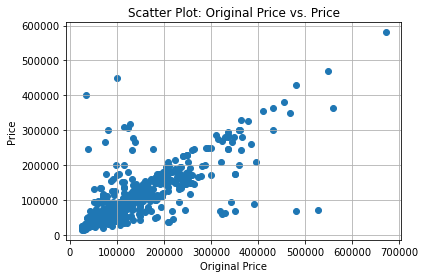

In [91]:
plt.scatter(df1['Original Price'], df1['Price'])
plt.xlabel('Original Price')
plt.ylabel('Price')
plt.title('Scatter Plot: Original Price vs. Price')
plt.grid(True)
plt.show()


In [92]:
new_df=df2.copy(deep=True)

In [93]:
new_df

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD
...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8,HP,Windows 11,AMD Ryzen 3,512 GB SSD
936,43490.0,134900.0,15.6,8,Acer,Windows 11,Intel Core i5,512 GB SSD
937,126990.0,154300.0,15.3,8,APPLE,Mac OS,Apple M2,256 GB SSD
938,94990.0,232314.0,15.6,8,GIGABYTE,Windows 11,Intel Core i5,512 GB SSD


In [94]:
new_df['Percentage Discount'] = ((new_df['Original Price'] - new_df['Price']) / new_df['Original Price']) * 100


In [95]:
new_df

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory,Percentage Discount
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD,26.210040
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD,14.388185
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD,38.576940
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD,11.827467
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD,20.469148
...,...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8,HP,Windows 11,AMD Ryzen 3,512 GB SSD,50.025004
936,43490.0,134900.0,15.6,8,Acer,Windows 11,Intel Core i5,512 GB SSD,67.761305
937,126990.0,154300.0,15.3,8,APPLE,Mac OS,Apple M2,256 GB SSD,17.699287
938,94990.0,232314.0,15.6,8,GIGABYTE,Windows 11,Intel Core i5,512 GB SSD,59.111375


In [96]:
new_df = new_df[new_df['Percentage Discount'] >= 0]

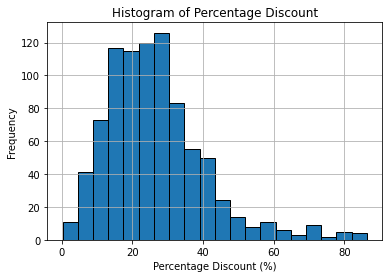

In [97]:
plt.hist(new_df['Percentage Discount'], bins=20, edgecolor='k')  
plt.xlabel('Percentage Discount (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Discount')
plt.grid(True)
plt.show()

In [98]:
new_df.groupby(['Name'])['Percentage Discount'].mean()

Name
APPLE        8.685950
ASUS        27.666010
Acer        27.608923
CHUWI       48.774354
DELL        28.584610
GIGABYTE    27.345800
HP          19.758686
Infinix     36.085635
Lenovo      34.763682
MSI         22.475039
SAMSUNG     13.903304
others      32.174622
Name: Percentage Discount, dtype: float64

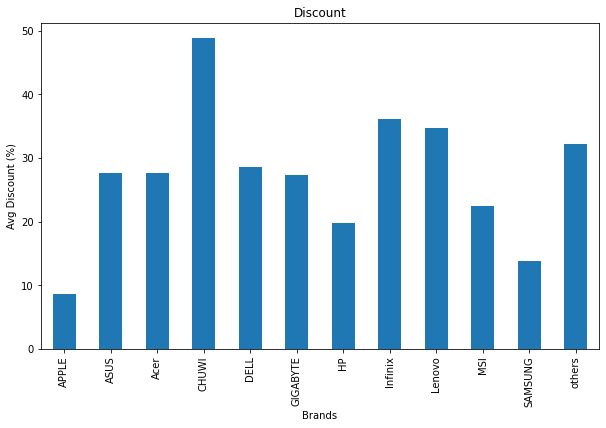

In [99]:
import pandas as pd
import matplotlib.pyplot as plt


mean_discount_by_name = new_df.groupby(['Name'])['Percentage Discount'].mean()


mean_discount_by_name.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Brands')
plt.ylabel('Avg Discount (%)')
plt.title('Discount')
plt.xticks(rotation=90)  
plt.show()


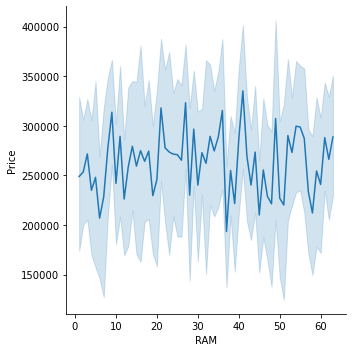

In [100]:
sns.relplot(x='RAM',y='Price',data=df,kind='line')

In [101]:
df1['Original Price']

0       31156.0
1       49631.0
2       69990.0
3       35147.0
4       49025.0
         ...   
935     59990.0
936    134900.0
937    154300.0
938    232314.0
939    115336.0
Name: Original Price, Length: 940, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

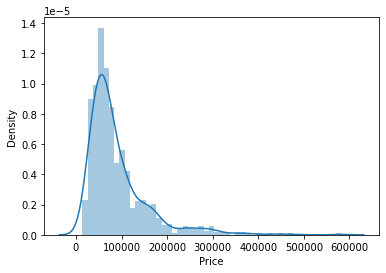

In [102]:
sns.distplot(df1.Price)

<AxesSubplot:xlabel='Price', ylabel='Density'>

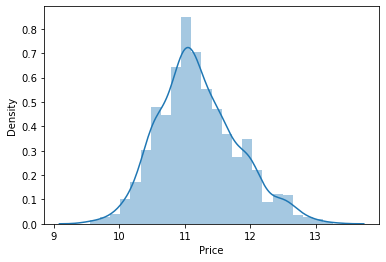

In [103]:
sns.distplot(np.log(df1.Price))

### Cheching For Outliers in Price

<AxesSubplot:xlabel='Price'>

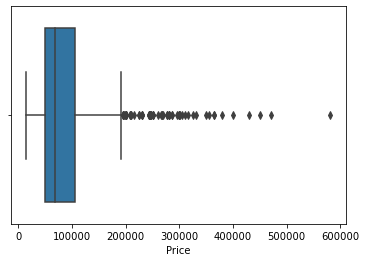

In [104]:
sns.boxplot(df1.Price)

In [105]:
a=df1[df1.Price>500000]
a=a.index

In [106]:
df1.drop(a,inplace=True,axis=0)

<AxesSubplot:xlabel='Price'>

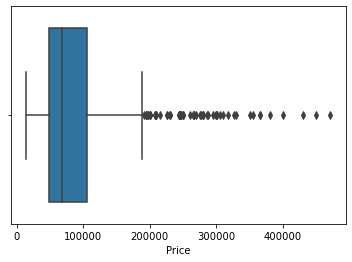

In [107]:
sns.boxplot(df1.Price)

<AxesSubplot:xlabel='Original Price'>

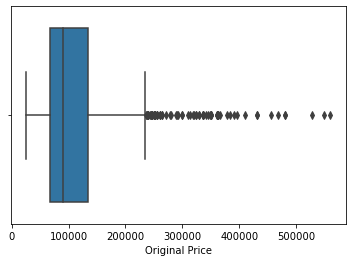

In [108]:
sns.boxplot(df1['Original Price'])

In [109]:
df1

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14.0,4.0,6,0,6,7
1,42490.0,49631.0,15.6,8.0,6,5,2,7
2,42990.0,69990.0,15.6,8.0,1,5,8,7
3,30990.0,35147.0,15.6,8.0,6,5,0,7
4,38990.0,49025.0,15.6,8.0,6,5,7,7
...,...,...,...,...,...,...,...,...
935,29980.0,59990.0,15.6,8.0,6,5,1,7
936,43490.0,134900.0,15.6,8.0,2,5,8,7
937,126990.0,154300.0,15.3,8.0,0,2,5,5
938,94990.0,232314.0,15.6,8.0,5,5,8,7


In [110]:
df1.Price.max()

470990.0

### Log Transformation 

In [111]:
df1.Price=np.log(df1.Price)

In [112]:
df1.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,10.042815,31156.0,14.0,4.0,6,0,6,7
1,10.657024,49631.0,15.6,8.0,6,5,2,7
2,10.668723,69990.0,15.6,8.0,1,5,8,7
3,10.341420,35147.0,15.6,8.0,6,5,0,7
4,10.571060,49025.0,15.6,8.0,6,5,7,7


# MODEL

In [113]:
y=df1['Price']
X=df1.drop('Price',axis=1)

In [114]:
X.head()

,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,31156.0,14.0,4.0,6,0,6,7
1,49631.0,15.6,8.0,6,5,2,7
2,69990.0,15.6,8.0,1,5,8,7
3,35147.0,15.6,8.0,6,5,0,7
4,49025.0,15.6,8.0,6,5,7,7


In [115]:
y.head()

0    10.042815
1    10.657024
2    10.668723
3    10.341420
4    10.571060
Name: Price, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [151]:
x_train.shape

(751, 7)

In [152]:
y_train.shape

(751,)

In [153]:
x_test.shape

(188, 7)

In [154]:
y_test.shape

(188,)

In [117]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
y_pred_test=le.predict(x_test)
len(y_pred_test)
y_pred_test

array([11.34132165, 11.43082012, 10.83351707, 11.09003105, 11.6064841 ,
       11.31362395, 11.15610396, 11.11801287, 11.25389487, 11.19422602,
       11.54298847, 11.41079126, 10.63751009, 10.5379803 , 10.78689018,
       11.30893049, 10.92510741, 10.58842837, 10.53752011, 11.06384625,
       11.42628618, 10.68623045, 10.70072748, 10.89877669, 11.28307054,
       10.70211327, 10.73870293, 11.14240642, 10.9168905 , 11.07637821,
       10.79501258, 11.0521223 , 10.78891834, 10.59603624, 10.90203   ,
       11.51788254, 10.56907852, 10.76659657, 11.06941226, 10.66250671,
       10.94892029, 10.94004613, 11.23035182, 11.14127872, 11.24273532,
       11.20173518, 11.15515291, 11.05153427, 10.89852268, 10.93644987,
       11.27185515, 11.41196193, 11.16495689, 11.12927661, 11.15075671,
       10.95780217, 10.88989666, 11.38522117, 11.19671485, 10.84882081,
       10.75192364, 12.27755299, 10.91598451, 11.42176918, 10.79905107,
       10.90552403, 10.91682286, 11.43841826, 11.37152352, 11.03

In [118]:
train_score=le.score(x_train,y_train)
print('Train score =',train_score)

Train score = 0.7065469334831255


In [119]:
y_pred_train=le.predict(x_train)
y_pred_test=le.predict(x_test)

In [120]:
from sklearn.metrics import r2_score

train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)

print(f'Training accuracy {train_score} \n Testing accuracy {test_score}')

Training accuracy 0.7065469334831255 
 Testing accuracy 0.6817815307600295


In [121]:
score=r2_score(y_test,y_pred_test)
print('R2 score = ',score)

R2 score =  0.6817815307600295


In [122]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squred Error=',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error = 0.26349068992973346
Mean Squred Error= 0.11706195014676578
Root Mean Squared Error 0.34214317200079525


In [123]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_test,'Varice':(y_test)-(y_pred_test)})

,Actual,Predicted,Varice
481,11.361986,11.341322,0.020665
730,11.842222,11.430820,0.411402
232,10.621083,10.833517,-0.212434
308,11.001933,11.090031,-0.088098
657,11.918324,11.606484,0.311840
...,...,...,...
212,11.442278,11.489717,-0.047439
22,10.403960,10.661923,-0.257963
519,11.511424,11.225922,0.285502
869,11.589794,11.142852,0.446942


## VIF

### Checking For Multicoillinearity

In [124]:
x1=X.copy(deep=True)
sc=StandardScaler()
scaled=sc.fit_transform(x1)
x1=pd.DataFrame(data=scaled,columns=x1.columns)
x1.head()

,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,-1.068592,-1.177099,-1.399050,0.425834,-5.651765,-0.112214,0.682501
1,-0.832405,0.434443,-0.810471,0.425834,0.327288,-1.512469,0.682501
2,-0.572133,0.434443,-0.810471,-1.113265,0.327288,0.587913,0.682501
3,-1.017571,0.434443,-0.810471,0.425834,0.327288,-2.212597,0.682501
4,-0.840153,0.434443,-0.810471,0.425834,0.327288,0.237850,0.682501


In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data['feature']=x1.columns

vif_data['VIF']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(vif_data)

          feature       VIF
0  Original Price  1.922711
1            Size  1.083783
2             RAM  1.845347
3            Name  1.034341
4   Operating Sys  1.089168
5      Processors  1.059751
6          Memory  1.181033


# OLS

In [126]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [127]:
df2.shape

(940, 8)

In [128]:
940*.7

658.0

In [129]:
ols_trn=df2.loc[:658]
ols_tst=df2.loc[658:]

In [130]:
ols_trn.head()

,Price,Original Price,Size,RAM,Name,Operating Sys,Processors,Memory
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD


In [131]:
ols_trn.rename(columns={'Operating Sys': 'operating_sys'}, inplace=True)
ols_trn.rename(columns={'Original Price': 'original_price'}, inplace=True)


In [132]:
ols_trn.head()

,Price,original_price,Size,RAM,Name,operating_sys,Processors,Memory
0,22990.0,31156.0,14,4,HP,Chrome,Intel Celeron,512 GB SSD
1,42490.0,49631.0,15.6,8,HP,Windows 11,AMD Ryzen 5,512 GB SSD
2,42990.0,69990.0,15.6,8,ASUS,Windows 11,Intel Core i5,512 GB SSD
3,30990.0,35147.0,15.6,8,HP,Windows 11,AMD Athlon,512 GB SSD
4,38990.0,49025.0,15.6,8,HP,Windows 11,Intel Core i3,512 GB SSD


In [133]:
model1 = smf.ols(formula='Price ~ original_price + Size + RAM + Name + operating_sys + Processors + Memory', data=ols_trn).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     77.15
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          3.60e-241
Time:                        10:48:46   Log-Likelihood:                -7483.4
No. Observations:                 659   AIC:                         1.509e+04
Df Residuals:                     599   BIC:                         1.536e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [134]:
model2 = smf.ols(formula='Price ~ original_price + Size + RAM + operating_sys + Processors + Memory', data=ols_trn).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     87.04
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          1.81e-241
Time:                        10:48:46   Log-Likelihood:                -7507.1
No. Observations:                 659   AIC:                         1.511e+04
Df Residuals:                     609   BIC:                         1.534e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [135]:
len(y_pred_test)

188

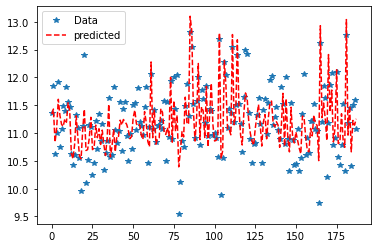

In [136]:
obsno=np.arange(0,188,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_test,'*',label='Data')
ax.plot(obsno,y_pred_test,'r--',label='predicted')
ax.legend(loc='best')

# SGD

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [138]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [139]:
X_train.shape,y_test.shape

((751, 7), (188,))

In [140]:
X_test.shape,y_train.shape

((188, 7), (751,))

In [141]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(X_train,y_train)
score=sgdr.score(X_train,y_train)
print('R-squared =',score)

R-squared = 0.7061744610750609


In [142]:
from sklearn.metrics import r2_score
y_test_pred=sgdr.predict(X_test)
r2_score(y_test,y_test_pred)

0.6821778838980538

In [143]:
y_pred=sgdr.predict(X_test)

from sklearn.metrics import mean_squared_error          
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

MSE = 0.11691614506073561
RMSE = 0.3419300294807925


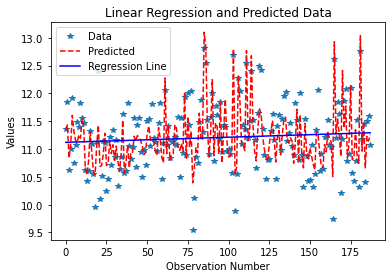

In [144]:
obsno = np.arange(0, 188, 1)

model = LinearRegression()
model.fit(obsno.reshape(-1, 1), y_test)
y_pred_regression = model.predict(obsno.reshape(-1, 1))

fig, ax = plt.subplots()

ax.plot(obsno, y_test, '*', label='Data')

ax.plot(obsno, y_pred_test, 'r--', label='Predicted')
ax.plot(obsno, y_pred_regression, 'b-', label='Regression Line')

ax.legend(loc='best')
plt.xlabel('Observation Number')
plt.ylabel('Values')
plt.title('Linear Regression and Predicted Data')
plt.show()


In [145]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_test,'Varice':(y_test)-(y_pred_test)})

,Actual,Predicted,Varice
481,11.361986,11.341322,0.020665
730,11.842222,11.430820,0.411402
232,10.621083,10.833517,-0.212434
308,11.001933,11.090031,-0.088098
657,11.918324,11.606484,0.311840
...,...,...,...
212,11.442278,11.489717,-0.047439
22,10.403960,10.661923,-0.257963
519,11.511424,11.225922,0.285502
869,11.589794,11.142852,0.446942
